In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate # use for scipy.interpolate.CubicHermiteSpline
from scipy.integrate import solve_ivp

Text(0.5, 1.0, 'Raptor problem space')

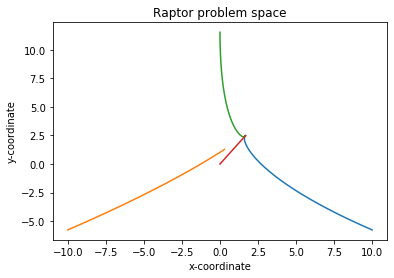

In [3]:
# 1) 

vrh = 25 # healthy raptor speed
vri = 20 # injured raptor speed
vh = 6 # human speed

tspan = [0,5]
VR0 = [10,-20*np.sqrt(3)/6]
VL0 = [-10,-20*np.sqrt(3)/6]
VT0 = [0,20*np.sqrt(3)/3]
H0 = [0,0]

def h(t):
    return np.array([vh*t*np.cos(56*np.pi/180), vh*t*np.sin(56*np.pi/180)])

def rheal(t,u):
    x,y = u;
    s = np.sqrt((h(t)[0]-x)**2+(h(t)[1]-y)**2)
    return vrh*np.array([(h(t)[0]-x)/s,(h(t)[1]-y)/s])
def rinj(t,u):
    x,y = u;
    s = np.sqrt((h(t)[0]-x)**2+(h(t)[1]-y)**2)
    return vri*np.array([(h(t)[0]-x)/s,(h(t)[1]-y)/s])

solrr = solve_ivp(rheal,tspan,VR0,dense_output=True);
solrl = solve_ivp(rheal,tspan,VL0,dense_output=True);
solrt = solve_ivp(rinj,tspan,VT0,dense_output=True);
t = np.linspace(0,0.5,10000)
ur = solrr.sol(t)
ul = solrl.sol(t)
ut = solrt.sol(t)
plt.plot(ur[0,:],ur[1,:])
plt.plot(ul[0,:],ul[1,:])
plt.plot(ut[0,:],ut[1,:])
plt.plot(h(t)[0],h(t)[1])
plt.xlabel("x-coordinate"); plt.ylabel("y-coordinate");
plt.title("Raptor problem space")

In [4]:
# in the above time frame we see that by t = 0.5s, both the raptor on the right and the top
# appear to have caught the human. Now we figure out which did so first.

for i in range(len(t)):
    urSep = np.sqrt((ur[0][i]-h(t[i])[0])**2 + (ur[1][i]-h(t[i])[1])**2)
    utSep = np.sqrt((ut[0][i]-h(t[i])[0])**2 + (ut[1][i]-h(t[i])[1])**2)
    if urSep < 0.01:
        print("The right raptor catches the human first at (appx) t = " +"{:.4f}".format(t[i])+"s")
        break
    if utSep < 0.01:
        print("The top raptor catches the human first at (appx) t = " +"{:.4f}".format(t[i])+"s")
        break
print("(accurate to four digits with 10000 timestamps)")

The top raptor catches the human first at (appx) t = 0.4769s
(accurate to four digits with 10000 timestamps)


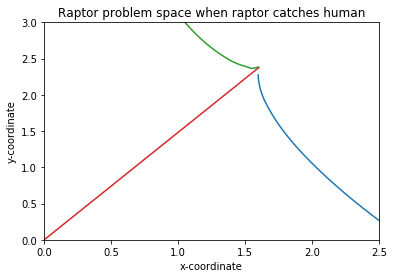

In [5]:
t = np.linspace(0,0.4769,1000)
ur = solrr.sol(t)
ul = solrl.sol(t)
ut = solrt.sol(t)
plt.plot(ur[0,:],ur[1,:])
plt.plot(ul[0,:],ul[1,:])
plt.plot(ut[0,:],ut[1,:])
plt.plot(h(t)[0],h(t)[1])
plt.xlabel("x-coordinate"); plt.ylabel("y-coordinate");
plt.title("Raptor problem space when raptor catches human")
plt.xlim(0,2.5);plt.ylim(0,3);

In [6]:
# 2)

def Euler(f,a,b,n,alpha):
    h = (b-a)/n
    t = [a]
    w = [alpha]
    for i in range(1,n+1):
        t.append(t[i-1]+h)
        w.append(w[i-1]+h*f(t[i-1],w[i-1]))
    return (t,w)

f = lambda t,y: (1+t)/(1+y)
t,w = Euler(f,1,2,2,2)
from tabulate import tabulate
print(tabulate([[t[0], w[0]], [t[1], w[1]], [t[2], w[2]]], headers=['ti', 'wi']))

  ti       wi
----  -------
 1    2
 1.5  2.33333
 2    2.70833


In [7]:
y = lambda t: -1+np.sqrt(t**2+2*t+6)
exact = y(1+10**-5)
print("exact solution y(1+10^-5): " + str(exact))
ns = np.logspace(0,7,16)
appx = []
for i in range(len(ns)):
    t,w=Euler(f,1,1+10**-5,int(ns[i]),2)
    appx.append(w[len(t)-1])
hs = 10**-5/ns
print(hs)

exact solution y(1+10^-5): 2.000006666675926
[1.00000000e-05 3.41454887e-06 1.16591440e-06 3.98107171e-07
 1.35935639e-07 4.64158883e-08 1.58489319e-08 5.41169527e-09
 1.84784980e-09 6.30957344e-10 2.15443469e-10 7.35642254e-11
 2.51188643e-11 8.57695899e-12 2.92864456e-12 1.00000000e-12]


[2.0000066666666667, 2.0000066666712963, 2.0000066666747687, 2.0000066666755556, 2.0000066666757994, 2.0000066666758824, 2.0000066666759113, 2.0000066666759193, 2.00000666667594, 2.000006666675754, 2.0000066666755716, 2.0000066666591025, 2.0000066666827525, 2.0000066668042926, 2.000006665935807, 2.00000666577904]


Text(0, 0.5, 'error')

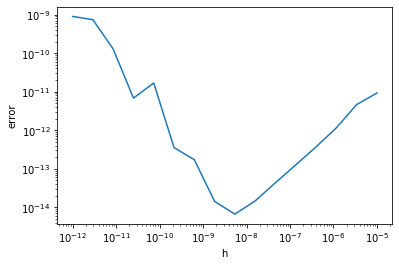

In [8]:
print(appx)
plt.loglog(hs,abs(appx-exact))
plt.xlabel("h"); plt.ylabel("error")

In [9]:
exactf = y(2)
print("exact solution y(2): " + str(exactf))
appxf = []
nsf = np.logspace(0,8,9)
for i in range(len(nsf)):
    t,w=Euler(f,1,2,int(nsf[i]),2)
    appxf.append(w[len(w)-1])
print(appxf)

exact solution y(2): 2.7416573867739413
[2.6666666666666665, 2.7355407599225927, 2.741056919124695, 2.7415974499003, 2.741651394183458, 2.741656787526666, 2.741657326838368, 2.74165738085943, 2.741657385362754]


Text(0, 0.5, 'error')

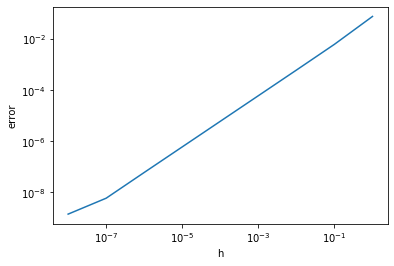

In [10]:
hs = 1/nsf
plt.loglog(hs,abs(appxf-exactf))
plt.xlabel("h"); plt.ylabel("error")